----
<h1>Forcedec: A times series decompostion technique</h1>

Copyright (c) 2016-2018 Universidade de Sao Paulo, Sao Carlos/SP, Brazil.
All Rights Reserved.

you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version.

Forcedec is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details.

This code was developed by members of Bio-inspired Computation - BioCom (http://www.biocom.icmc.usp.br) at Instituto de Ciencias Matematicas e de Computacao - ICMC - (http://www.icmc.usp.br) of Universidade de Sao Paulo, Sao Carlos/SP, Brazil. The initial developer of the original code is Felipe S. L. G. Duarte <felipelageduarte@usp.br>.

Contributor(s): 
* Felipe S. L. G. Duarte - felipelageduarte@usp.br
* Rodrigo Fernandes de Mello - mello@icmc.usp.br
                
You should have received a copy of the GNU General Public License along with Nmap. If not, see <http://www.gnu.org/licenses/>.

based on the publication:
```
  @Article{forcedec2017,
   Title                    = {Forcedec: A times series decompostion technique},
   Author                   = {Duarte, Felipe S. L. G. and Mello, Rodrigo F.},
   Journal                  = {},
   Year                     = {},
   Month                    = {},
   Number                   = {},
   Pages                    = {},
   Volume                   = {},
   ISSN                     = {}
   Doi                      = {},
 }
```
The software is provided "As is", without warranty of any kind, express or implied, including but not limited to the warranties of merchantability, fitness for a particular purpose and noninfringement. In no event shall the authors or copyright holders be liable for any claim, damages or other liability, whether in an action of contract, tort or otherwise, arising from, out of or in connection with the software or the use or other dealings in the software.

----

<h3>Results</h3>


In [22]:
require(plotly)
require(ggplot2)
require(gridExtra)

In [23]:
options(repr.matrix.max.rows = 1000)
options(repr.matrix.max.cols = 30)
options(jupyter.plot_mimetypes = 'image/png')
options(repr.plot.width=16, repr.plot.height=8)

In [24]:
seriesFolder = 'data'
modelFolder  = 'model'
resultFolder = 'testResult'
imagesFolder = 'images'

Leitura Resultados
===

In [25]:
modelsLake = list.files(path = modelFolder, pattern = NULL, all.files = FALSE, full.names = TRUE, recursive = FALSE)

In [26]:
modelsName = c("fourier_" ,"wavelet_" ,"ssa_" ,"emdrp_" ,"forcedec_")
listResult = list()
for(i in 1:length(modelsName)){
    models = modelsLake[grepl(modelsName[i], modelsLake)]
    testData = data.frame()
    for(j in 1:length(models)){
        load(models[j])
        testData = rbind(testData, model$eval)
    }
    listResult[[i]] = testData
}

Métrica: MDDL
===

Warning message:
“Removed 36 rows containing non-finite values (stat_boxplot).”

pdf 
  2

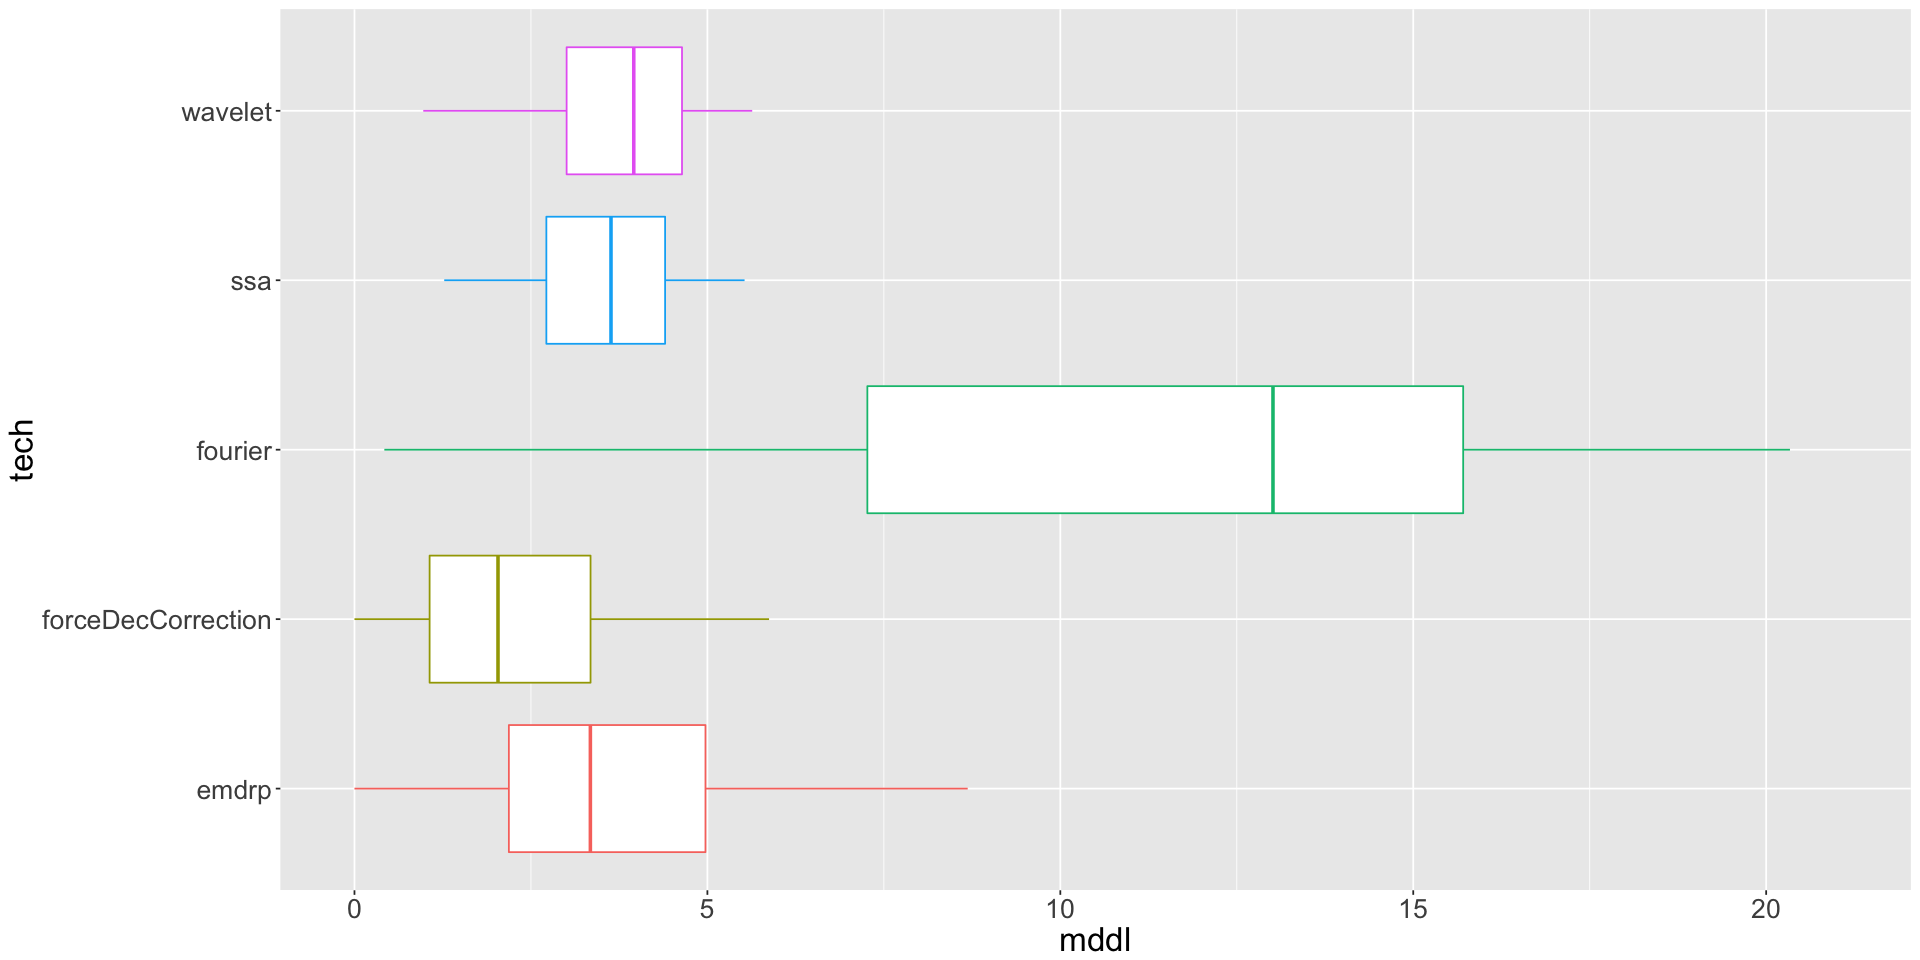

In [27]:
options(repr.plot.width=16, repr.plot.height=8) 
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][c('testId','tech','mddl')])
p = ggplot(data, aes(tech, mddl, color = tech)) +
    geom_boxplot(outlier.shape = NA) +
    coord_flip() +
    scale_y_continuous(limits = c(0, 21)) +
    theme(text = element_text(size=20), legend.position="none")
plot(p) 
dev.copy2pdf(file = paste(imagesFolder,"result_mddl_boxplot.pdf", sep='/'), width=16, height=5)

In [28]:
n = 'mddl'
m = matrix(unlist(lapply(listResult,function(x){
    cbind(unique(x$tech), mean(unlist(x[n])), sd(unlist(x[n])))
})), ncol=3, byrow = T)
colnames(m)<-c('Tech', 'mean', 'sd')
m

Tech,mean,sd
fourier,11.7077207126322,6.14722573455826
wavelet,8.58930771309564,9.68924838267543
ssa,10.2825670158012,13.4379932963978
emdrp,8.41806347935233,11.1446554132369
forceDecCorrection,5.40987246035271,7.80632508839168


Métrica: MDA
===

pdf 
  2

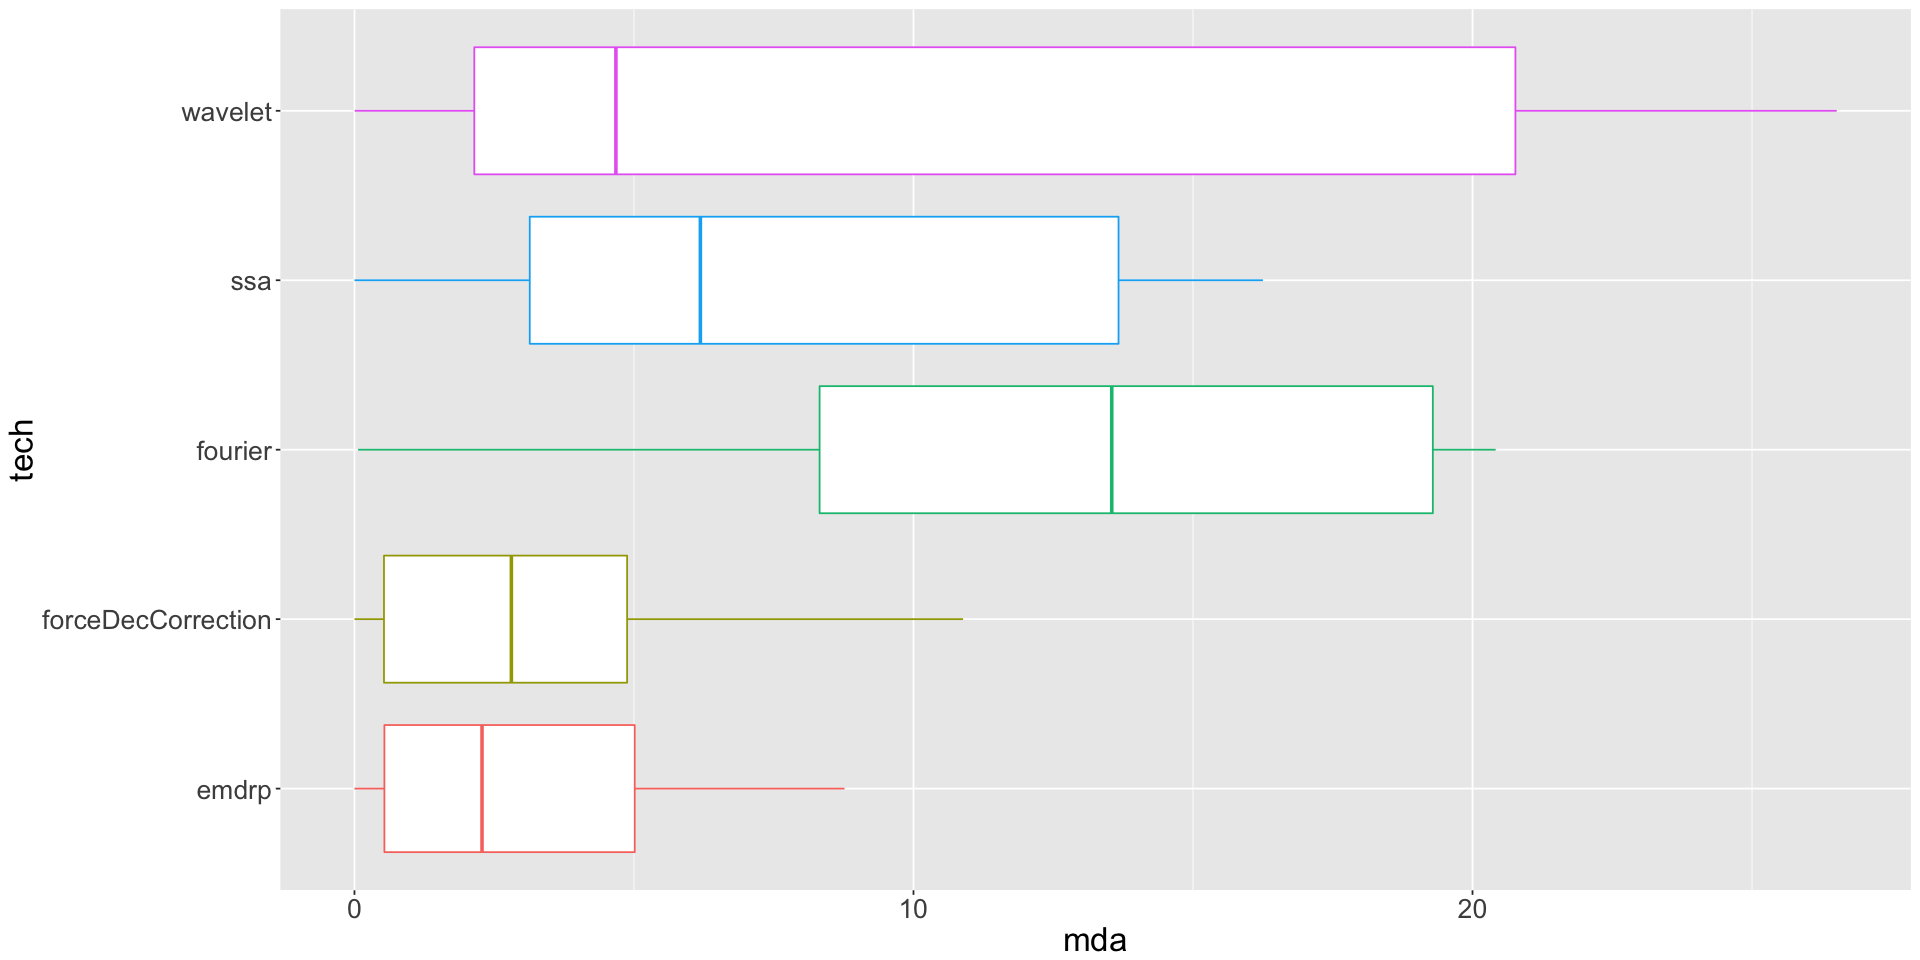

In [29]:
options(repr.plot.width=16, repr.plot.height=8)    
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][c('testId','tech','mda')])
p = ggplot(data, aes(tech, mda, color = tech)) + 
    geom_boxplot(outlier.shape = NA) +
    coord_flip() +
    theme(text = element_text(size=20), legend.position="none")
plot(p) 
dev.copy2pdf(file = paste(imagesFolder,"result_mda_boxplot.pdf", sep='/'), width=16, height=5)

In [30]:
n = 'mda'
m = matrix(unlist(lapply(listResult,function(x){cbind(unique(x$tech), mean(unlist(x[n])), sd(unlist(x[n])))})), ncol=3, byrow = T)
colnames(m)<-c('Tech', 'mean', 'sd')
m

Tech,mean,sd
fourier,13.1420430837582,6.81700248610247
wavelet,11.0495331959186,10.3972655193003
ssa,7.75171400464606,5.60510807020618
emdrp,3.03886687623324,2.82752379542341
forceDecCorrection,3.05159099320647,2.59618855233431


Métrica: Dist
===

In [31]:
options(repr.plot.width=8, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][c('testId','tech','mddl', 'mda', 'dist')])
    
mddl = data$mddl
data$mddl = (mddl - min(mddl))/(max(mddl) - min(mddl))
mda = data$mda
data$mda = (mda - min(mda))/(max(mda) - min(mda))
data$dist = sqrt(mddl^2 + mda^2)

pdf 
  2

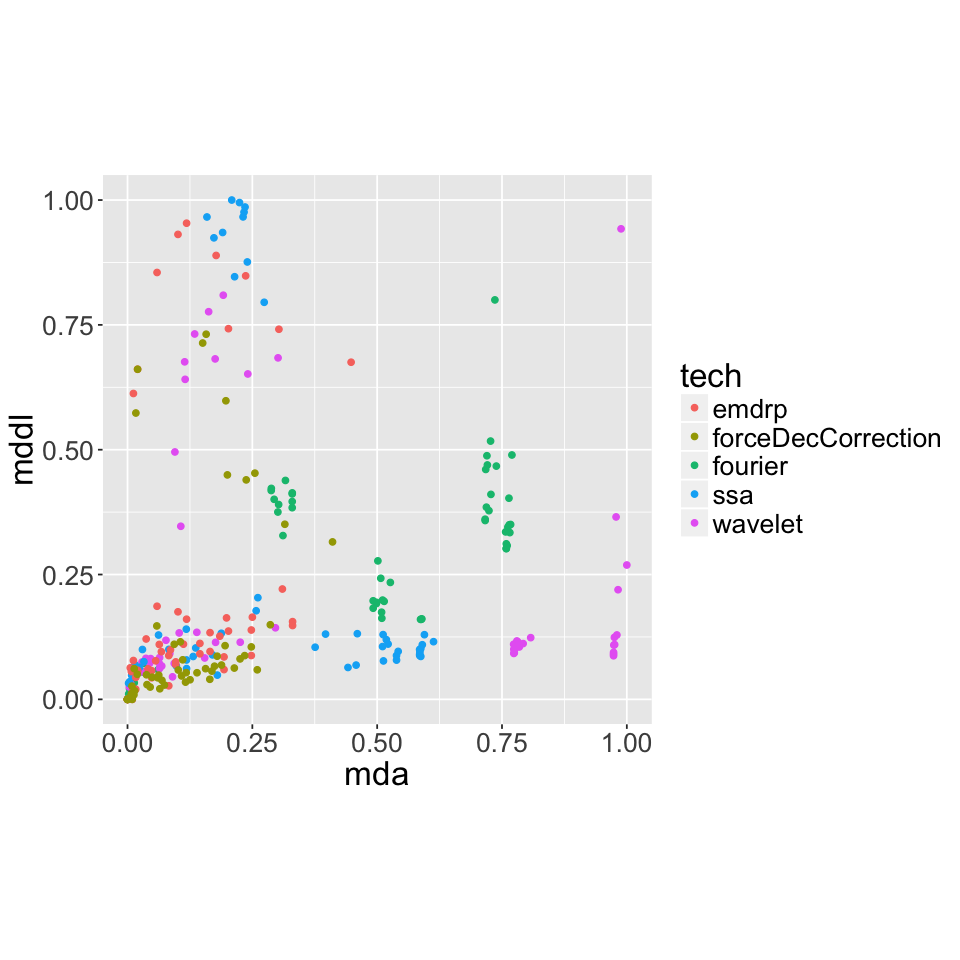

In [32]:
p = ggplot(data, aes(x = mda, y = mddl, color = tech)) + 
    geom_point() + 
    theme(text = element_text(size=20)) + 
    coord_fixed()
plot(p)    
dev.copy2pdf(file = paste(imagesFolder,"result_dist_scatterplot.pdf", sep='/'), width=16, height=5)

Warning message:
“Removed 141 rows containing missing values (geom_point).”

pdf 
  2

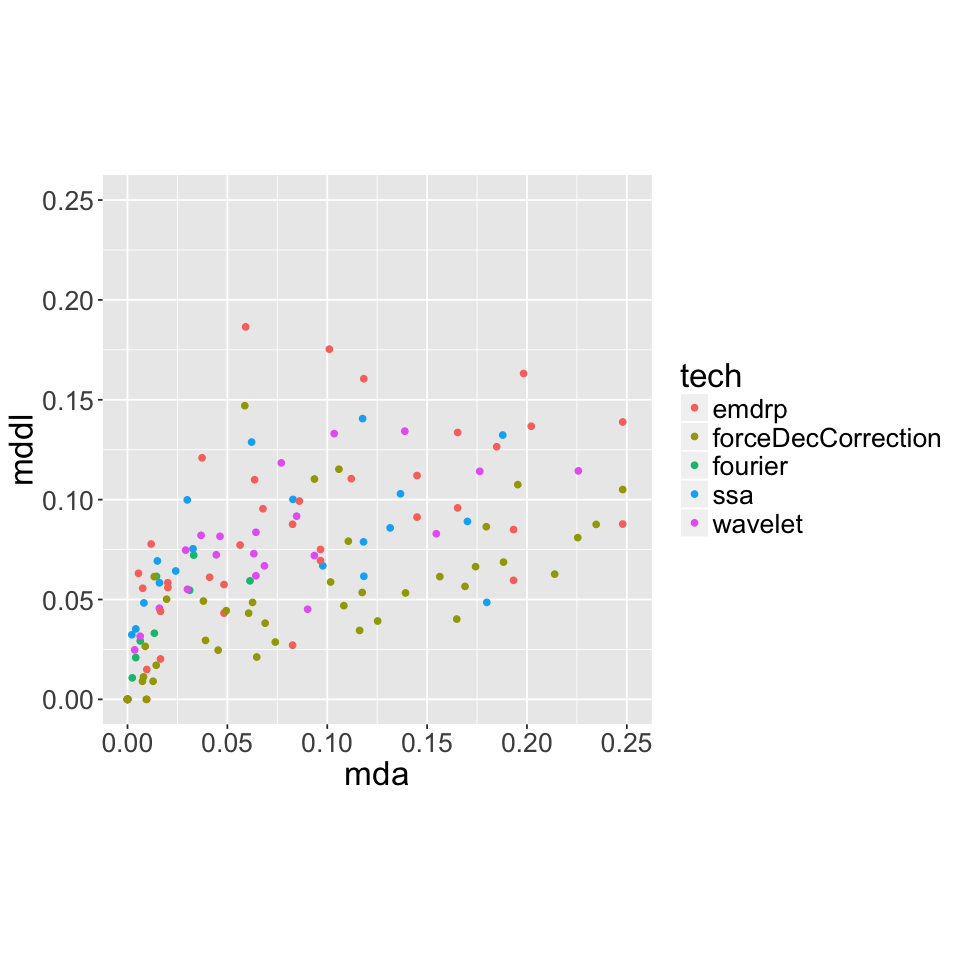

In [33]:
p = ggplot(data, aes(x = mda, y = mddl, color = tech)) + geom_point() + theme(text = element_text(size=20)) + coord_fixed() + xlim(0, 0.25) + ylim(0, 0.25)
plot(p)    
dev.copy2pdf(file = paste(imagesFolder,"result_dist_zoom_scatterplot.pdf", sep='/'), width=16, height=5)

pdf 
  2

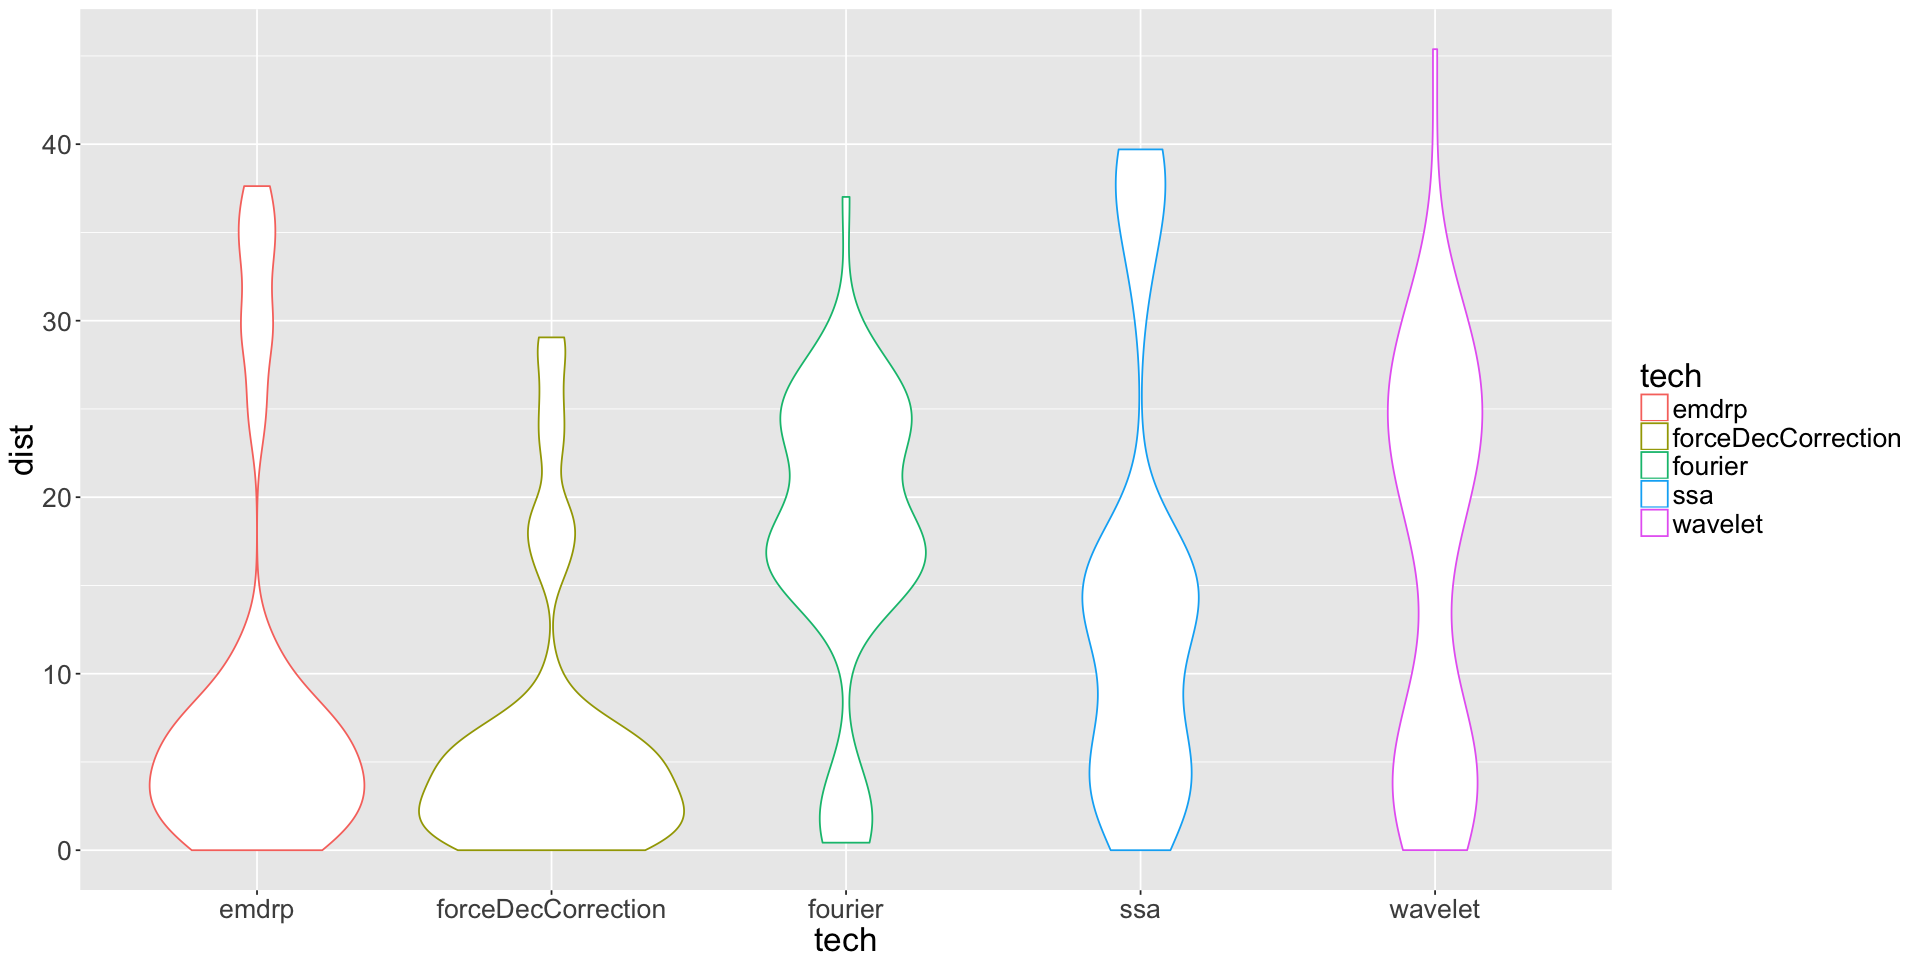

In [34]:
options(repr.plot.width=16, repr.plot.height=8)    
p = ggplot(data, aes(tech, dist, color = tech)) + geom_violin(scale = "area") + theme(text = element_text(size=20))
plot(p) 
dev.copy2pdf(file = paste(imagesFolder,"result_dist_violin.pdf", sep='/'), width=16, height=5)

pdf 
  2

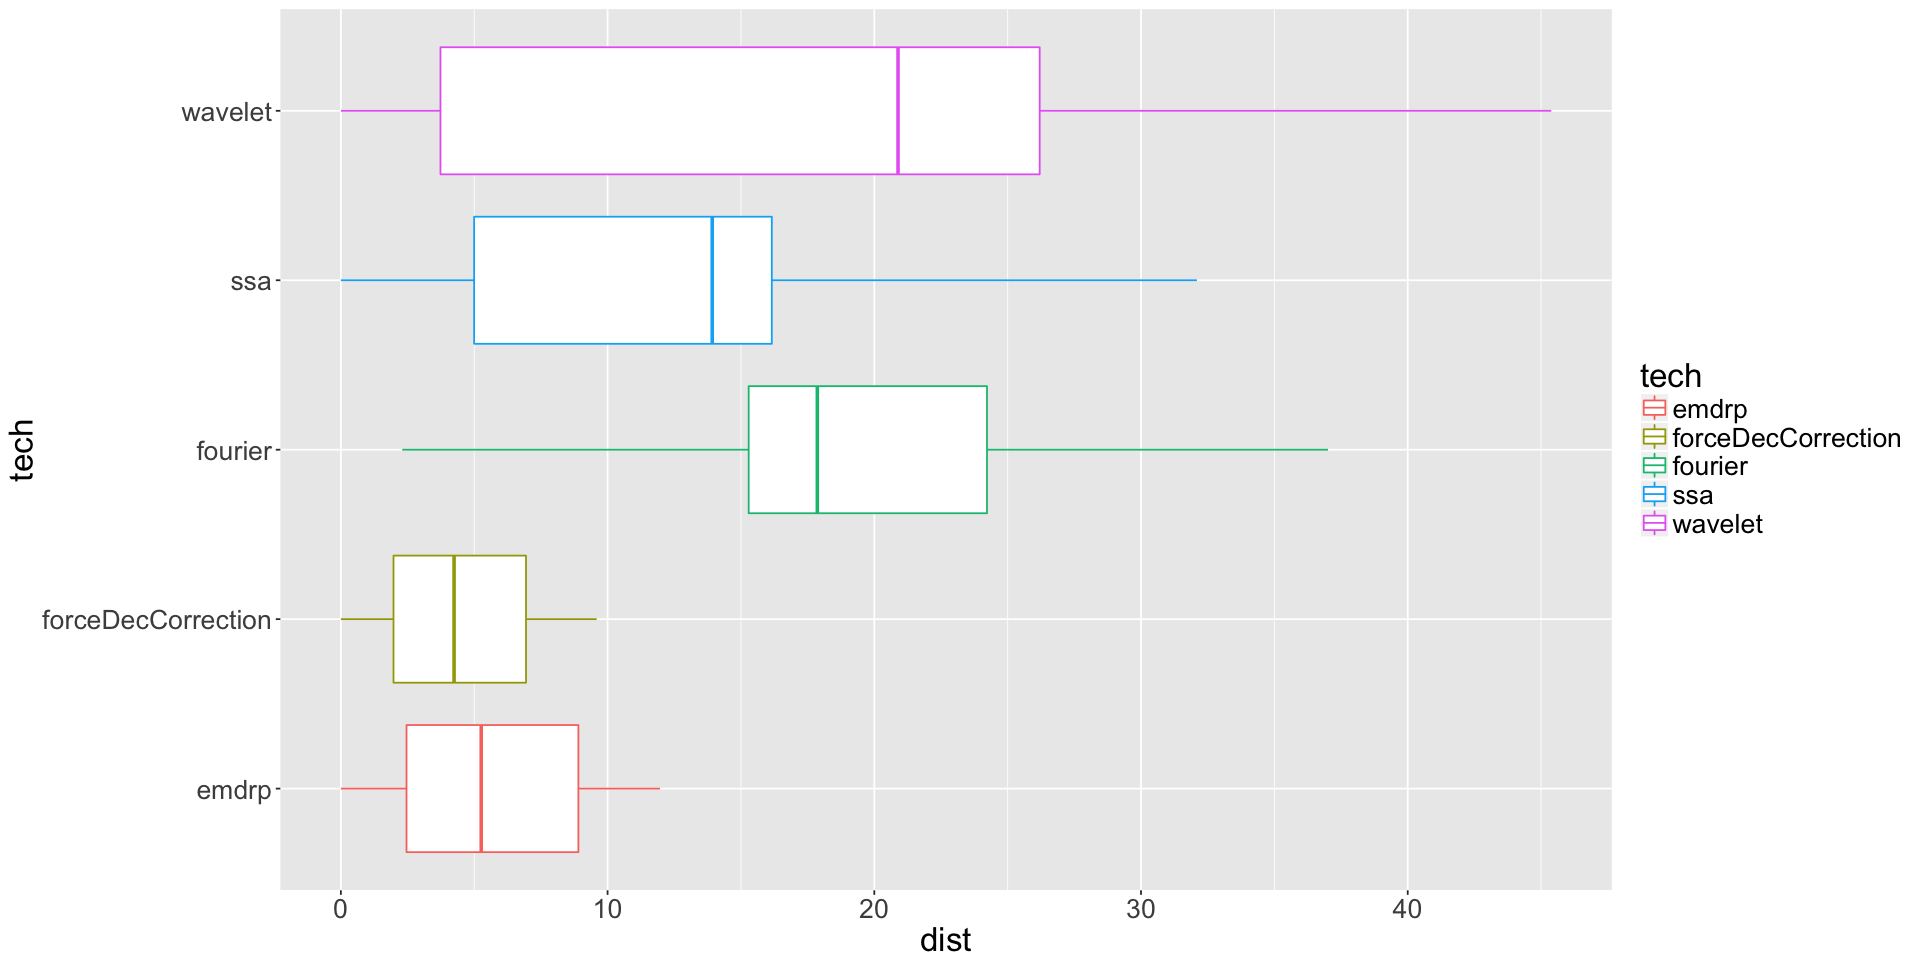

In [36]:
options(repr.plot.width=16, repr.plot.height=8)    
p = ggplot(data, aes(tech, dist, color = tech)) + geom_boxplot(outlier.shape = NA) + coord_flip() + theme(text = element_text(size=20))
plot(p) 
dev.copy2pdf(file = paste(imagesFolder,"result_dist_boxplot.pdf", sep='/'), width=16, height=5)

In [37]:
m = merge(aggregate(dist ~ tech, data, mean), aggregate(dist ~ tech, data, sd), by='tech')
colnames(m)<-c('Tech', 'mean', 'sd')
m

Tech,mean,sd
emdrp,9.441805,11.089702
forceDecCorrection,6.738766,7.792326
fourier,18.070743,8.196442
ssa,15.025858,12.285376
wavelet,16.293460,11.449331


In [47]:
forcedec.idx = which(data$tech == 'forceDecCorrection')
emdrp.idx    = which(data$tech == 'emdrp')
#forcedec = data[]
stat = t.test(data$dist[forcedec.idx], data$dist[emdrp.idx], paired=TRUE)
stat


	Paired t-test

data:  data$dist[forcedec.idx] and data$dist[emdrp.idx]
t = -4.747, df = 54, p-value = 1.559e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.844653 -1.561424
sample estimates:
mean of the differences 
              -2.703039 


---
Dataset Seno
===

In [ ]:
scenario.idx = 1:11

In [ ]:
options(repr.plot.width=16, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][scenario.idx,c('testId','tech','mddl')])
ggplot(data, aes(tech, mddl, color = tech)) + geom_boxplot() + theme(text = element_text(size=20))
dev.copy2pdf(file = paste(imagesFolder,"seno_result_mddl.pdf", sep='/'), width=16, height=5)

In [ ]:

t.test(forcedec, emdrp)

In [ ]:
options(repr.plot.width=16, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][scenario.idx,c('testId','tech','mda')])
ggplot(data, aes(x = testId, y = mda, color = tech)) + geom_line() + theme(text = element_text(size=20))
dev.copy2pdf(file = paste(imagesFolder,"seno_result_mda.pdf", sep='/'), width=16, height=5)

In [ ]:
options(repr.plot.width=8, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][scenario.idx, c('testId','tech','mddl', 'mda', 'dist')])
    
mddl = data$mddl
data$mddl = (mddl - min(mddl))/(max(mddl) - min(mddl))
mda = data$mda
data$mda = (mda - min(mda))/(max(mda) - min(mda))
data$dist = sqrt(mddl^2 + mda^2)

In [ ]:
options(repr.plot.width=16, repr.plot.height=8)    
p = ggplot(data, aes(tech, dist, color = tech)) + geom_boxplot() + coord_flip() + theme(text = element_text(size=20))
plot(p) 
dev.copy2pdf(file = paste(imagesFolder,"seno_result_dist_boxplot.pdf", sep='/'), width=16, height=5)

---
Dataset Lorenz
===

In [ ]:
scenario.idx = 12:22

In [ ]:
options(repr.plot.width=16, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][scenario.idx,c('testId','tech','mddl')])
ggplot(data, aes(x = testId, y = mddl, color = tech)) + geom_line() + theme(text = element_text(size=20))
dev.copy2pdf(file = paste(imagesFolder,"lorenz_result_mddl.pdf", sep='/'), width=16, height=5)

In [ ]:
options(repr.plot.width=16, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][scenario.idx,c('testId','tech','mda')])
ggplot(data, aes(x = testId, y = mda, color = tech)) + geom_line() + theme(text = element_text(size=20))
dev.copy2pdf(file = paste(imagesFolder,"lorenz_result_mda.pdf", sep='/'), width=16, height=5)

In [ ]:
options(repr.plot.width=8, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][scenario.idx, c('testId','tech','mddl', 'mda', 'dist')])
    
mddl = data$mddl
data$mddl = (mddl - min(mddl))/(max(mddl) - min(mddl))
mda = data$mda
data$mda = (mda - min(mda))/(max(mda) - min(mda))
data$dist = sqrt(mddl^2 + mda^2)

options(repr.plot.width=16, repr.plot.height=8)    
p = ggplot(data, aes(tech, dist, color = tech)) + geom_boxplot() + coord_flip() + theme(text = element_text(size=20))
plot(p) 
dev.copy2pdf(file = paste(imagesFolder,"lorenz_result_dist_boxplot.pdf", sep='/'), width=16, height=5)

---
Dataset Rossler
===

In [ ]:
scenario.idx = 23:33

In [ ]:
options(repr.plot.width=16, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][scenario.idx,c('testId','tech','mddl')])
ggplot(data, aes(x = testId, y = mddl, color = tech)) + geom_line() + theme(text = element_text(size=20))
dev.copy2pdf(file = paste(imagesFolder,"rossler_result_mddl.pdf", sep='/'), width=16, height=5)

In [ ]:
options(repr.plot.width=16, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][scenario.idx,c('testId','tech','mda')])
ggplot(data, aes(x = testId, y = mda, color = tech)) + geom_line() + theme(text = element_text(size=20))
dev.copy2pdf(file = paste(imagesFolder,"rossler_result_mda.pdf", sep='/'), width=16, height=5)

In [ ]:
options(repr.plot.width=8, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][scenario.idx, c('testId','tech','mddl', 'mda', 'dist')])
    
mddl = data$mddl
data$mddl = (mddl - min(mddl))/(max(mddl) - min(mddl))
mda = data$mda
data$mda = (mda - min(mda))/(max(mda) - min(mda))
data$dist = sqrt(mddl^2 + mda^2)

options(repr.plot.width=16, repr.plot.height=8)    
p = ggplot(data, aes(tech, dist, color = tech)) + geom_boxplot() + coord_flip() + theme(text = element_text(size=20))
plot(p) 
dev.copy2pdf(file = paste(imagesFolder,"rossler_result_dist_boxplot.pdf", sep='/'), width=16, height=5)

---
Dataset Logistic
===

In [ ]:
scenario.idx = 34:44

In [ ]:
options(repr.plot.width=16, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][scenario.idx,c('testId','tech','mddl')])
ggplot(data, aes(x = testId, y = mddl, color = tech)) + geom_line() + theme(text = element_text(size=20))
dev.copy2pdf(file = paste(imagesFolder,"logistic_result_mddl.pdf", sep='/'), width=16, height=5)

In [ ]:
options(repr.plot.width=16, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][scenario.idx,c('testId','tech','mda')])
ggplot(data, aes(x = testId, y = mda, color = tech)) + geom_line() + theme(text = element_text(size=20))
dev.copy2pdf(file = paste(imagesFolder,"logistic_result_mda.pdf", sep='/'), width=16, height=5)

In [ ]:
options(repr.plot.width=8, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][scenario.idx, c('testId','tech','mddl', 'mda', 'dist')])
    
mddl = data$mddl
data$mddl = (mddl - min(mddl))/(max(mddl) - min(mddl))
mda = data$mda
data$mda = (mda - min(mda))/(max(mda) - min(mda))
data$dist = sqrt(mddl^2 + mda^2)

options(repr.plot.width=16, repr.plot.height=8)    
p = ggplot(data, aes(tech, dist, color = tech)) + geom_boxplot() + coord_flip() + theme(text = element_text(size=20))
plot(p) 
dev.copy2pdf(file = paste(imagesFolder,"logistic_result_dist_boxplot.pdf", sep='/'), width=16, height=5)

---
Dataset Henon
===

In [ ]:
scenario.idx = 45:55

In [ ]:
options(repr.plot.width=16, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][scenario.idx,c('testId','tech','mddl')])
ggplot(data, aes(x = testId, y = mddl, color = tech)) + geom_line() + theme(text = element_text(size=20))
dev.copy2pdf(file = paste(imagesFolder,"henon_result_mddl.pdf", sep='/'), width=16, height=5)

In [ ]:
options(repr.plot.width=16, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][scenario.idx,c('testId','tech','mda')])
ggplot(data, aes(x = testId, y = mda, color = tech)) + geom_line() + theme(text = element_text(size=20))
dev.copy2pdf(file = paste(imagesFolder,"henon_lorenz_result_mda.pdf", sep='/'), width=16, height=5)

In [ ]:
options(repr.plot.width=8, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][scenario.idx, c('testId','tech','mddl', 'mda', 'dist')])
    
mddl = data$mddl
data$mddl = (mddl - min(mddl))/(max(mddl) - min(mddl))
mda = data$mda
data$mda = (mda - min(mda))/(max(mda) - min(mda))
data$dist = sqrt(mddl^2 + mda^2)

options(repr.plot.width=16, repr.plot.height=8)    
p = ggplot(data, aes(tech, dist, color = tech)) + geom_boxplot() + coord_flip() + theme(text = element_text(size=20))
plot(p) 
dev.copy2pdf(file = paste(imagesFolder,"henon_result_dist_boxplot.pdf", sep='/'), width=16, height=5)